# ゼロから作るDeep Learning

## 2章 パーセプトロン

### 2.4 パーセプトロンの限界

#### 2.4.1 XORゲート

- XORゲートの真理値表

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |




- ORゲートのパーセプトロン
$$
y=\left\{
\begin{array}{ll}
0 & (-0.5 + x_1 + x_2 \leq 0) \\
1 & (-0.5 + x_1 + x_2 > 0) \\
\end{array} \right.
$$

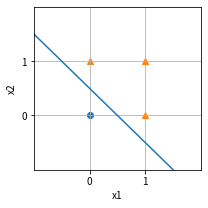

In [41]:
# ORゲートパーセプトロンの可視化

import matplotlib.pyplot as plt
import numpy as np


x = np.arange(-3,3,0.5)
y = 0.5 - x

plt.figure(figsize=(3,3))

plt.scatter(0, 0,marker='o')
plt.scatter([0, 1, 1], [1, 0, 1], marker='^')
plt.plot(x, y)

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()




### 2.5 多層パーセプトロン

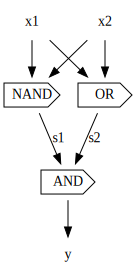

In [49]:
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='cds')

dg.node('x1', shape='plaintext')
dg.node('x2', shape='plaintext')
dg.node('y', shape='plaintext')
dg.node('NAND')
dg.node('AND')
dg.node('OR')
dg.edge('x1', 'NAND')
dg.edge('x1', 'OR')
dg.edge('x2', 'NAND')
dg.edge('x2', 'OR')
dg.edge('NAND', 'AND', 's1')
dg.edge('OR', 'AND', 's2')
dg.edge('AND', 'y')

dg


#### 2.5.2 XORゲートの実装

In [52]:
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y


In [54]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


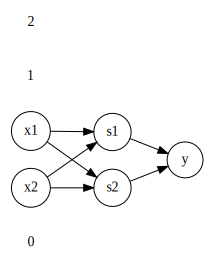

In [95]:
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')

with dg.subgraph(name="0") as sg:
  sg.node('第0層', shape='none')
  sg.node('x1')
  sg.node('x2')
#  sg.edge('第0層', 'x1')

with dg.subgraph(name="1") as sg:
  sg.node('第1層', shape='none')
  sg.node('s1')
  sg.node('s2')

with dg.subgraph(name="2") as sg:
  sg.node('第2層', shape='none')
  sg.node('y')

dg.edge('x2', 's2')
dg.edge('x2', 's1')
dg.edge('x1', 's2')
dg.edge('x1', 's1')
dg.edge('s1', 'y')
dg.edge('s2', 'y')

dg